Data Processing

In [1]:
import pandas as pd
import numpy as np

asset_prices = pd.read_csv('stock_prices.csv',index_col = 0).dropna()
asset_prices.tail()

,BTC-USD,IYW,IYJ,IBB,IGV,IXP,IYT,VNQ,PBS,PBJ,...,KIE,KBE,XSD,ITB,ITA,IHI,IHF,IHE,IEZ,FDN
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-27,7290.088379,57.173157,80.308365,120.175476,46.720409,58.457748,46.485012,77.621094,32.995434,32.446976,...,32.340710,41.409401,105.142799,43.223701,106.847931,43.402683,38.891342,49.775578,18.885595,139.880005
2019-12-28,7317.990234,57.173157,80.308365,120.175476,46.720409,58.457748,46.485012,77.621094,32.995434,32.446976,...,32.340710,41.409401,105.142799,43.223701,106.847931,43.402683,38.891342,49.775578,18.885595,139.880005
2019-12-29,7422.652832,57.173157,80.308365,120.175476,46.720409,58.457748,46.485012,77.621094,32.995434,32.446976,...,32.340710,41.409401,105.142799,43.223701,106.847931,43.402683,38.891342,49.775578,18.885595,139.880005
2019-12-30,7292.995117,56.774376,79.812355,118.811203,46.197628,57.901279,46.236183,77.696999,32.672035,32.409370,...,32.377384,41.426964,104.403175,43.097282,106.520805,43.146618,38.640560,49.388424,19.109865,138.460007
2019-12-31,7193.599121,56.774376,79.812355,118.811203,46.197628,57.901279,46.236183,77.696999,32.672035,32.409370,...,32.377384,41.426964,104.403175,43.097282,106.520805,43.146618,38.640560,49.388424,19.109865,138.460007


In [2]:
returns = asset_prices.pct_change(periods=1)
returns = returns.iloc[1:, :]
print(returns.head(), returns.shape)

             BTC-USD       IYW       IYJ       IBB       IGV       IXP  \
Date                                                                     
2014-09-18 -0.071926  0.006453  0.004811  0.007656  0.008334  0.006093   
2014-09-19 -0.069843 -0.004469 -0.003064  0.000582 -0.004982  0.002019   
2014-09-20  0.035735  0.000000  0.000000  0.000000  0.000000  0.000000   
2014-09-21 -0.024659  0.000000  0.000000  0.000000  0.000000  0.000000   
2014-09-22  0.008352 -0.008392 -0.011526 -0.009737 -0.010128 -0.009298   

                 IYT       VNQ       PBS       PBJ  ...       KIE       KBE  \
Date                                                ...                       
2014-09-18  0.003353 -0.008760 -0.000789  0.006937  ...  0.007776  0.012666   
2014-09-19 -0.005013  0.001223  0.000352 -0.002762  ... -0.004863 -0.005890   
2014-09-20  0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
2014-09-21  0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
2014-09

In [3]:
def normalize_returns(r_df):
    mean_r = r_df.mean(axis=0)
    sd_r = r_df.std(axis=0)
    normed_df = (r_df - mean_r) /sd_r
    return normed_df

normed_r = normalize_returns(returns)
normed_r.head(), normed_r.shape

(             BTC-USD       IYW       IYJ       IBB       IGV       IXP  \
 Date                                                                     
 2014-09-18 -1.921157  0.623914  0.570561  0.583434  0.767407  0.841885   
 2014-09-19 -1.867152 -0.520533 -0.429577  0.027647 -0.547834  0.269260   
 2014-09-20  0.870221 -0.052250 -0.040408 -0.018051 -0.055785 -0.014454   
 2014-09-21 -0.695636 -0.052250 -0.040408 -0.018051 -0.055785 -0.014454   
 2014-09-22  0.160251 -0.931587 -1.504171 -0.782988 -1.056122 -1.321314   
 
                  IYT       VNQ       PBS       PBJ  ...       KIE       KBE  \
 Date                                                ...                       
 2014-09-18  0.331145 -1.183758 -0.115902  1.018897  ...  1.008881  1.140828   
 2014-09-19 -0.546436  0.126190  0.019112 -0.437129  ... -0.704925 -0.570178   
 2014-09-20 -0.020574 -0.034350 -0.022518 -0.022452  ... -0.045518 -0.027066   
 2014-09-21 -0.020574 -0.034350 -0.022518 -0.022452  ... -0.045518 -0.027

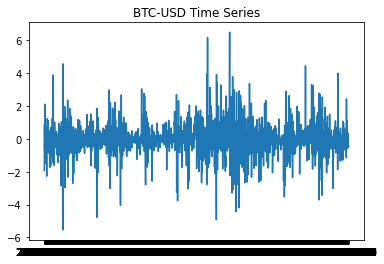

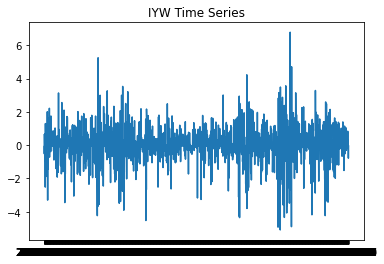

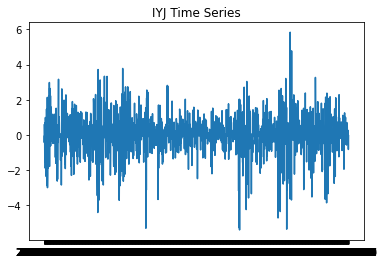

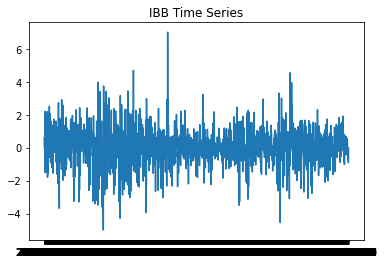

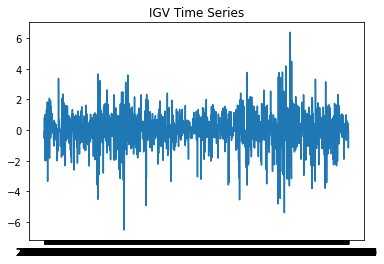

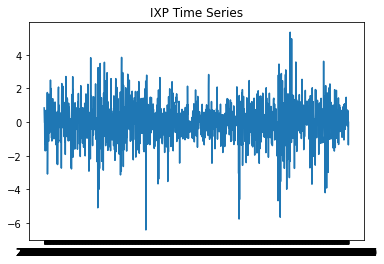

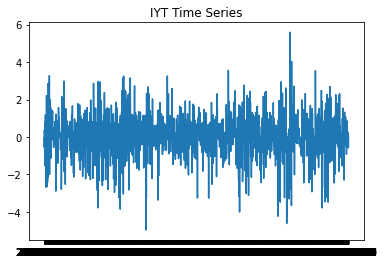

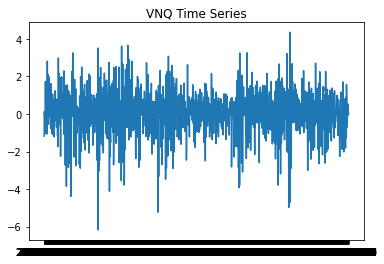

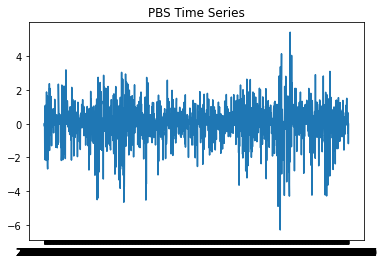

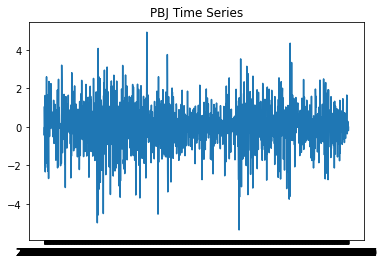

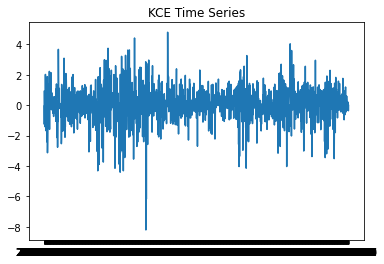

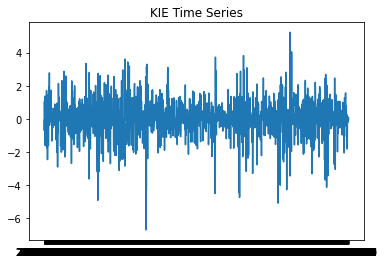

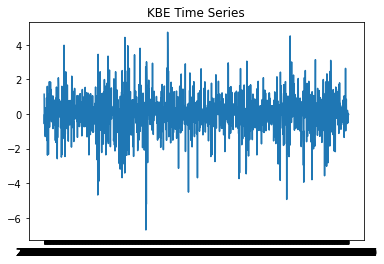

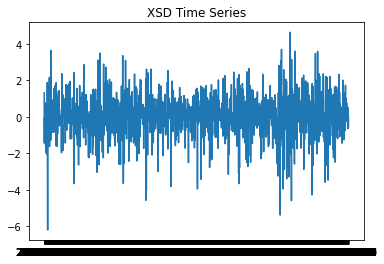

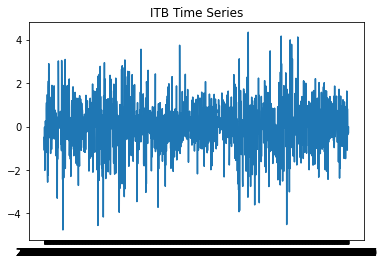

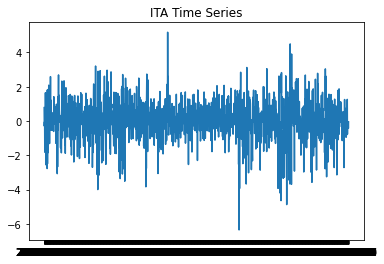

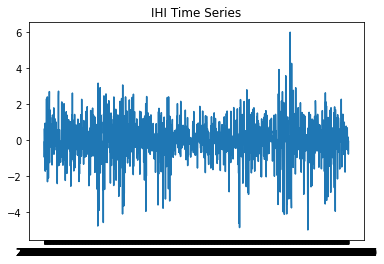

KeyboardInterrupt: 

In [4]:
import matplotlib.pyplot as plt
for column in normed_r.columns:
    plt.plot(normed_r[column])
    plt.title(f"{column} Time Series")
    plt.show()

In [5]:
import numpy as np
import pandas as pd

def compute_rolling_correlations(df, window_size, stride, starting_points):
    num_assets = df.shape[1]
    correlations = []

    for start in starting_points:
        for start_idx in range(start - 1, len(df) - window_size + 1, stride):
            window_data = df.iloc[start_idx:start_idx + window_size]
            corr_matrix = window_data.corr().values

            for i in range(num_assets):
                for j in range(i + 1, num_assets):
                    correlations.append(corr_matrix[i, j])
    
    return np.array(correlations).reshape(-1, len(starting_points))

# Define parameters
window_size = 100
stride = 100
starting_points = [1, 11, 21, 31]

# Compute the rolling correlations
rolling_correlations = compute_rolling_correlations(normed_r, window_size, stride, starting_points)

# Reshape to 55875 x 24 format
rolling_correlations = rolling_correlations.reshape(-1, 19)

# Example to access the correlation matrix for a specific starting point and window
# rolling_correlations[starting_point][window_index][asset_i, asset_j]
example_corr_matrix = rolling_correlations  # First window from the first starting point
print(example_corr_matrix.shape)


(840, 19)


In [6]:
# Split the data for walk-forward optimization
train_set = rolling_correlations[:, 0:16]
dev_set = rolling_correlations[:, 1:17]
test1_set = rolling_correlations[:, 2:18]
test2_set = rolling_correlations[:, 3:19]

ARIMA MODEL

In [7]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

datasets = [train_set, dev_set, test1_set, test2_set]
orders = [(1, 1, 0), (0, 1, 1), (1, 1, 1), (2, 1, 1), (2, 1, 0), (1,0,1), (1,0,0), (2,0,0), (2,0,1)]

# Initialize a dictionary to store the best order for each dataset
best_orders = {}
results = {}
predictions = []

# Loop through each dataset
for idx, data in enumerate(datasets):
    X = []
    Y = []
    dataset_names = ["train_set", "dev_set", "test1_set", "test2_set"]
    best_aic = float("inf")
    best_order = None
    
    # Loop through each time series in the dataset
    for T in data:
        models = []
        aic_values = []
        
        # Evaluate each ARIMA order
        for order in orders:
            try:
                model = ARIMA(T, order=order)
                fitted_model = model.fit()
                models.append(fitted_model)
                aic_values.append(fitted_model.aic)
                
                # Update the best order if the current one has a lower AIC
                if fitted_model.aic < best_aic:
                    best_aic = fitted_model.aic
                    best_order = order

            except:
                print(f"Failed to fit ARIMA model for order {order}")
                continue
        
        # Calculate residuals using the model with the lowest AIC
        residual = T - models[np.argmin(aic_values)].fittedvalues
        predictions.append(models[np.argmin(aic_values)].fittedvalues)
        X.append(residual[:15])
        Y.append(residual[15])

    # Store the results for the dataset
    results[dataset_names[idx]] = (np.array(X), np.array(Y))
    
    # Store the best order for this dataset
    best_orders[dataset_names[idx]] = best_order

print("Best ARIMA orders for each dataset:")
print(best_orders)

c:\Users\brark\anaconda3\envs\portfolio2\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\Users\brark\anaconda3\envs\portfolio2\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\brark\anaconda3\envs\portfolio2\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\Users\brark\anaconda3\envs\portfolio2\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\brark\anaconda3\envs\portfolio2\lib\site-packages\statsmodels\base\mod

Best ARIMA orders for each dataset:
{'train_set': (1, 0, 0), 'dev_set': (1, 0, 0), 'test1_set': (1, 0, 0), 'test2_set': (2, 0, 0)}


In [8]:
print("Train set X = ")
print(results["train_set"][0])
print("Train set Y = ")
print(results["train_set"][1])

Train set X = 
[[ 3.36055854e-02 -1.10569586e-02 -3.16257963e-02 ... -3.46820551e-02
   1.71081871e-02 -1.73864584e-02]
 [-7.49842705e-01 -4.34904550e-01  7.24897415e-04 ...  6.11819325e-02
   2.95761162e-02  2.61079317e-02]
 [ 1.51648597e-01 -4.14612730e-02  2.38843703e-02 ... -3.15089725e-02
   1.30306207e-01  6.63232773e-02]
 ...
 [-6.12331841e-01  6.59895782e-03 -1.78940126e-01 ...  1.14898872e-01
   1.65778821e-01 -1.62339791e-02]
 [-1.32790555e-01  8.49459032e-02  2.00031058e-01 ...  6.19077578e-03
   2.52800344e-02  1.32156631e-01]
 [ 5.22382482e-02  2.97822219e-02 -3.00761451e-01 ...  1.95990188e-01
   1.08912835e-01 -2.31970458e-01]]
Train set Y = 
[-1.69405735e-02  5.56051563e-02 -4.81643929e-02 -2.21192498e-01
 -2.96391302e-01  2.26477746e-02 -4.10005600e-02 -1.28382203e-01
 -2.26320959e-02 -2.39930262e-02 -1.98156623e-01 -3.95178271e-02
  1.85166586e-01  1.61848276e-01  2.42353322e-01 -6.02581699e-02
  1.49849328e-01  3.29104475e-02 -1.11926782e-01 -6.51491320e-02
  4.72615

In [9]:
print("Dev set X = ")
print(results["dev_set"][0])
print("Dev set Y = ")
print(results["dev_set"][1])

Dev set X = 
[[-0.01266871 -0.0260123   0.00857681 ...  0.02468282 -0.01547063
  -0.01089404]
 [ 0.11329871 -0.05924914  0.1009921  ... -0.01155959  0.00211446
   0.00266362]
 [-0.13149147  0.04042054 -0.00178669 ...  0.14096407  0.06620357
  -0.03781087]
 ...
 [-0.1321775   0.19402608  0.14764076 ...  0.12681616 -0.07484584
  -0.01051534]
 [ 0.06497772  0.21104819 -0.48538189 ... -0.04115072  0.05219457
   0.09079904]
 [ 0.08202047 -0.31285513  0.25602724 ...  0.10856277 -0.23242516
   0.01172118]]
Dev set Y = 
[-2.97548266e-02 -3.27888931e-02 -5.45159255e-02 -3.24710601e-02
 -3.43236604e-02  7.92955906e-02 -3.55980472e-01  6.74739324e-03
  2.72302720e-02 -1.14206945e-01 -9.35831026e-02  3.56603069e-02
  2.10085818e-01  3.24825921e-02 -1.30677519e-01 -5.79869863e-02
  1.01668559e-01 -8.67823925e-02 -9.77130455e-02  1.01496066e-01
  7.21141826e-02 -2.29434921e-01 -1.10179815e-01  2.10665035e-01
  1.26430553e-01  1.12582076e-01 -4.52405311e-02  8.49627582e-02
 -1.04680553e-01 -1.7053449

In [10]:
print("Test 1 set X = ")
print(results["test1_set"][0])
print("Test 1 set Y = ")
print(results["test1_set"][1])

Test 1 set X = 
[[-0.02335109  0.012564    0.01530879 ... -0.01610028 -0.00760077
  -0.02713463]
 [-0.12493756  0.09591913  0.08099829 ...  0.01882496  0.01950214
  -0.01381736]
 [ 0.11942671 -0.00572486  0.07963908 ...  0.05880105 -0.03024772
  -0.04696099]
 ...
 [ 0.18126457  0.25561827  0.21901428 ... -0.06882333  0.0095464
   0.05971023]
 [ 0.2264563  -0.44688303 -0.19937651 ...  0.06415859  0.11245341
   0.29650859]
 [-0.23083466  0.38270073  0.37699657 ... -0.23968678  0.01830086
  -0.03045427]]
Test 1 set Y = 
[-3.51658811e-02 -5.30029684e-02 -1.45789164e-01  9.81287269e-02
  5.29041393e-02  2.51084887e-02 -2.86680346e-02  7.67820165e-02
 -4.61817182e-02  1.20246450e-01 -2.70991453e-01 -3.56986583e-02
  4.46390587e-02 -2.76628574e-02 -2.63786565e-02 -6.41045123e-02
 -2.50740324e-02 -3.66147324e-01  7.82449808e-02  3.44215073e-02
 -2.54010128e-01 -3.92090939e-02 -9.55412862e-02  7.93970420e-02
 -1.25657938e-01 -2.63326960e-01 -2.21081565e-01 -1.00171109e-01
 -1.06589861e-01 -5.54

In [11]:
print("Test 2 set X = ")

print(results["test2_set"][0], test2_set[0].shape)
print("Test 2 set Y = ")
print(results["test2_set"][1])


Test 2 set X = 
[[ 0.02039379  0.01609438  0.01488052 ... -0.01264873 -0.01622288
  -0.02320488]
 [ 0.17890746  0.07907349  0.05356884 ...  0.02540997 -0.0156527
  -0.03143704]
 [-0.05979642  0.08845773 -0.24418281 ... -0.02302495 -0.03974185
  -0.13796053]
 ...
 [ 0.29656895  0.2305112  -0.24684067 ... -0.02465846 -0.06386036
  -0.15388227]
 [-0.42962918  0.02467367 -0.05075765 ...  0.11202434  0.27101496
  -0.24875667]
 [-0.28040671 -0.0368056  -0.16298458 ...  0.04804952  0.00280444
   0.16967561]] (16,)
Test 2 set Y = 
[-5.32901231e-02 -2.71661767e-01 -2.71434812e-03  1.74815877e-01
  7.37899790e-04  7.52093742e-02  1.65794781e-01 -1.85232156e-02
 -5.57895687e-03  2.61429233e-02 -3.30021645e-03 -6.69792910e-02
  2.94945645e-03 -2.59823517e-01  2.37904352e-01  3.12125871e-02
 -1.55833146e-01 -3.36855649e-02  9.38140822e-02 -6.26998791e-03
  2.90781331e-02 -2.41046042e-01  2.65746126e-03 -1.12639163e-01
 -2.65959222e-02 -1.27442926e-01 -9.06661879e-03  1.83208580e-02
 -5.06427528e-01

In [12]:
predictions=np.asarray(predictions).reshape(840,64,1)
print(predictions[:,-1].shape)
np.save('array_data.npy', predictions[:,-2])

(840, 1)


LSTM

In [13]:
import pandas as pd
import numpy as np
import os
!pip install tensorflow
# import tensorflow
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, LSTM, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.regularizers import l1_l2
# Train - Dev - Test Generation
train_X= results["train_set"][0]
print(train_X.shape)
dev_X =results["dev_set"][0]
test1_X = results["test1_set"][0]
test2_X = results["test2_set"][0]
train_Y = results["train_set"][1]
print(test2_X)
dev_Y = results["dev_set"][1]
test1_Y = results["test1_set"][1]
test2_Y = results["test2_set"][1]

STEP = 15
train_X_1 = np.asarray(train_X).reshape((int(12600/STEP), 15, 1))
dev_X_1 = np.asarray(dev_X).reshape((int(12600/STEP), 15, 1))
test1_X_1 = np.asarray(test1_X).reshape((int(12600/STEP), 15, 1))
test2_X_1 = np.asarray(test2_X).reshape((int(12600/STEP), 15, 1))
train_Y_1 = np.asarray(train_Y).reshape(int(12600/STEP), 1)
dev_Y_1 = np.asarray(dev_Y).reshape(int(12600/STEP), 1)
test1_Y_1 = np.asarray(test1_Y).reshape(int(12600/STEP), 1)
test2_Y_1 = np.asarray(test2_Y).reshape(int(12600/STEP), 1)

(840, 15)
[[ 0.02039379  0.01609438  0.01488052 ... -0.01264873 -0.01622288
  -0.02320488]
 [ 0.17890746  0.07907349  0.05356884 ...  0.02540997 -0.0156527
  -0.03143704]
 [-0.05979642  0.08845773 -0.24418281 ... -0.02302495 -0.03974185
  -0.13796053]
 ...
 [ 0.29656895  0.2305112  -0.24684067 ... -0.02465846 -0.06386036
  -0.15388227]
 [-0.42962918  0.02467367 -0.05075765 ...  0.11202434  0.27101496
  -0.24875667]
 [-0.28040671 -0.0368056  -0.16298458 ...  0.04804952  0.00280444
   0.16967561]]


0.009096150286495686 0.021240808069705963


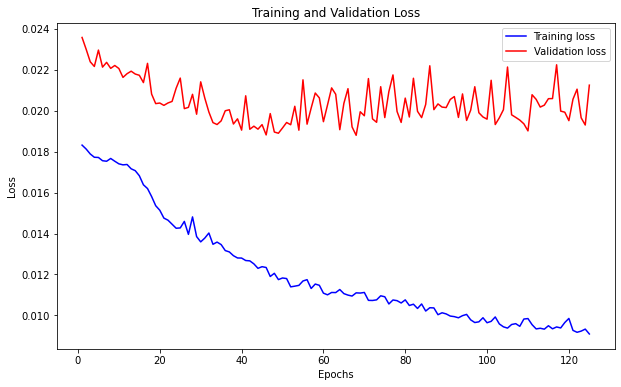

In [14]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.activations import tanh, relu

# Define a custom activation function class 'Double_Tanh' that inherits from the Keras 'Activation' class
class Double_Tanh(Activation):
    def __init__(self, activation, **kwargs):
        super(Double_Tanh, self).__init__(activation, **kwargs)  # Initialize the base Activation class
        self.__name__ = 'double_tanh'  # Set the name of the custom activation function

# Define the custom activation function 'double_tanh'
def double_tanh(x):
    return (K.tanh(x) * 2)  # Apply the tanh activation function and multiply the result by 2

# Register the custom activation function with Keras so that it can be used in model layers
get_custom_objects().update({'double_tanh':Double_Tanh(double_tanh)})

# Build the model using the Sequential API
model = Sequential()

# Add an LSTM layer with 16 units; input_shape is (15, 1) indicating 15 time steps and 1 feature
model.add(LSTM(16, input_shape=(15,1)))

# Add a Dense layer with 1 unit, which will output a single value for each input sequence
model.add(Dense(1))

# Add the custom double_tanh activation function to the model
model.add(Activation(double_tanh))

# Compile the model with mean squared error as the loss function and Adam as the optimizer
# Also track mean squared error (mse) and mean absolute error (mae) as additional metrics
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae'])

# Train the model using the training data (train_X_1 and train_Y_1) and validate on dev_X_1 and dev_Y_1
# The model will train for 125 epochs with a batch size of 32, and shuffle the data each epoch
model_fitted=model.fit(train_X_1, train_Y_1, validation_data=(dev_X_1,dev_Y_1), 
                       epochs=125, verbose=0, shuffle=True, batch_size=32)

# Extract the loss values (training and validation) from the model's training history
loss_values = model_fitted.history["loss"] 
val_loss_values = model_fitted.history["val_loss"]

# Create a range of epoch numbers to match the number of loss values
epochs = range(1, len(loss_values) + 1)

# Print the final loss and validation loss after the last epoch
print(loss_values[-1], val_loss_values[-1])

# Plot the training and validation loss over the epochs to visualize model performance
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss_values, 'b', label='Training loss')  # Plot training loss in blue
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')  # Plot validation loss in red
plt.title('Training and Validation Loss')  # Set the title of the plot
plt.xlabel('Epochs')  # Label the x-axis as 'Epochs'
plt.ylabel('Loss')  # Label the y-axis as 'Loss'
plt.legend()  # Display the legend to differentiate between the plots
plt.show()  # Display the plot


In [15]:
from sklearn.metrics import mean_squared_error
y_pred_est = model.predict(test2_X_1, verbose=0)
print("mean_squared_error_reg",mean_squared_error(test2_Y_1, y_pred_est))
print(y_pred_est.shape)


mean_squared_error_reg 0.016464530381275374
(840, 1)


Standard Deviation to calculate Covariance


In [16]:
import numpy as np
import pandas as pd

def standard_deviations(df, window_size, stride, starting_points):
    """
    Calculate rolling standard deviations for each asset in the dataset.

    Arguments:
    df -- DataFrame containing the data (e.g., asset returns)
    window_size -- the size of the rolling window (e.g., 100)
    stride -- the step size to move the rolling window (e.g., 100)
    starting_points -- list of indices from which to start rolling calculations (e.g., [1, 11, 21, 31])

    Returns:
    A NumPy array containing the rolling standard deviations.
    """
    num_assets = df.shape[1]  # Number of assets in the DataFrame
    rolling_std = []  # List to store rolling standard deviations for each window

    # Loop through each starting point
    for start in starting_points:
        std_devs = []  # List to store standard deviations for the current starting point

        # Loop through the DataFrame with the specified window size and stride
        for start_idx in range(start - 1, len(df) - window_size + 1, stride):
            # Extract the data for the current window
            window_data = df.iloc[start_idx:start_idx + window_size]
            # Calculate standard deviations for the current window and append to rolling_std
            std_values = window_data.std().values
            rolling_std.append(std_values)
        
        # Append the standard deviations for this starting point to std_devs
        std_devs.append(rolling_std)
    
    # Return the list of standard deviations as a NumPy array
    return np.array(std_devs)

# Define parameters
window_size = 100  # Rolling window size
stride = 100  # Stride for moving the window
starting_points = [1, 11, 21, 31]  # Different starting points for the rolling calculation

# Compute the rolling standard deviations
rolling_standard = standard_deviations(normed_r, window_size, stride, starting_points)

# Reshape the rolling standard deviations to a matrix with 19 columns (this might represent different assets or features)
stan = rolling_standard.reshape(-1, 19)
print(stan.shape)  # Print the shape of the reshaped matrix

# Select a specific subset of the standard deviations (e.g., the last 21 rows, second to last column)
std = stan[:21, -2]

std_matrix = np.outer(std, std)


(84, 19)


In [17]:
# Extract the first 210 elements from y_pred_est to represent correlations
correlations = y_pred_est[:210]
print(correlations.shape)  # Print the shape of the extracted correlations array

# Flatten the 210 correlations into a 1D array
correlations = correlations.ravel()

# Define a function to convert the 1D array of correlations into a symmetric 21x21 matrix
def get_matrix(array, n):
    """
    Converts a 1D array of correlations into a symmetric 21x21 matrix.

    Arguments:
    array -- 1D NumPy array of correlations (length should be 210)
    n -- The value to fill the diagonal of the matrix with (e.g., 1 for correlation matrices)

    Returns:
    A 21x21 symmetric matrix with the input correlations in the upper and lower triangles, and
    the diagonal filled with the value of n.
    """
    matrix = np.zeros((21, 21))  # Initialize an empty 21x21 matrix with zeros

    # Get the indices of the upper triangle of the matrix, excluding the diagonal
    upper_triangle_indices = np.triu_indices(21, 1)

    # Assign the correlations from the array to the upper triangle of the matrix
    matrix[upper_triangle_indices] = array

    # Make the matrix symmetric by copying the upper triangle to the lower triangle
    matrix = matrix + matrix.T

    # Fill the diagonal of the matrix with the value of n (usually 1 for correlation matrices)
    np.fill_diagonal(matrix, n)

    # Return the resulting symmetric matrix
    return matrix

# Convert the 1D correlations array into a symmetric 21x21 matrix with diagonal elements set to 1
corr_matrix = get_matrix(correlations, 1)

# Print the resulting correlation matrix
print(corr_matrix)


(210, 1)
[[ 1.          0.01910518 -0.12586783 -0.00781705  0.14282036  0.08600514
   0.05496854 -0.01886913  0.06995224  0.06827793  0.11733356 -0.02127135
  -0.06019831  0.08023442 -0.15748216  0.19566171  0.05500132 -0.05366899
   0.01843742  0.14151736 -0.00488426]
 [ 0.01910518  1.          0.07609463 -0.11606181 -0.02565    -0.01346192
  -0.1275316  -0.01356067 -0.01131215  0.01807801 -0.06050284 -0.00964246
   0.26297951  0.08409472  0.29045311  0.04129536  0.17369312 -0.10779803
  -0.02485831  0.05980845  0.076432  ]
 [-0.12586783  0.07609463  1.         -0.06230012 -0.07661677 -0.05060933
  -0.01632181 -0.07779533  0.28480798 -0.01961978  0.0176593   0.05786364
   0.11929081  0.13685782  0.02128354 -0.03965782 -0.08268224 -0.05631417
   0.17577271 -0.04142191 -0.06816364]
 [-0.00781705 -0.11606181 -0.06230012  1.          0.00964958  0.1290192
   0.21507852  0.19228996  0.01290984 -0.14769797  0.10396165  0.00738828
  -0.05690687  0.03936078  0.17703259  0.07207703  0.04584251

In [18]:
# Load a NumPy array from a file named 'array_data.npy'
loaded_array = np.load('array_data.npy')

# Print the shape of the loaded array to verify its dimensions
print(loaded_array.shape)

# Add the first 210 elements of the loaded array (flattened) to the existing correlations array
# This is typically used for incorporating ARIMA model predictions into the correlation data
correlations_with_arima = correlations + loaded_array[:210].ravel()

# Print the shape of the resulting correlations array after the addition
print(correlations_with_arima.shape)

# Convert the flattened correlations_with_arima array into a symmetric correlation matrix
# Using the get_matrix function; the diagonal elements are set to 1
corr_matrix_1 = get_matrix(correlations_with_arima, 1)

# Calculate the covariance matrix by element-wise multiplying the correlation matrix (corr_matrix_1)
# with the standard deviation matrix (std_matrix); this step is based on the relationship between
# correlation and covariance: Cov(X,Y) = Corr(X,Y) * StdDev(X) * StdDev(Y)
cov_mat = corr_matrix_1 * std_matrix


(840, 1)
(210,)


In [19]:
np.save('correlation_matrix.npy', corr_matrix)
np.savetxt('correlation_matrix.csv', corr_matrix, delimiter=',')
np.save('covariance_matrix.npy', cov_mat)
np.savetxt('covariance_matrix.csv', cov_mat, delimiter=',')